# Modelagem de tópicos
### corpus: artigos e resumos do ENANCIB 2014

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "enancib_2014_gts"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

333


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

['1111  a adequação de descritores na representação de artigos científicos: uma análise sobre o tema “estudos métricos” na medicina  adequation of descriptors on representation of scientific papers: an analysis about “metric studies” on medicine  leilah santiago bufrem walter moreira joão batista ernesto de moraes juliana larazzotto freitas  resumo:   considera   que   os   termo   descritores   de   pesquisa   nem   sempre   representam adequadamente  um  objeto  de  estudo,  temática  ou  conceito  a  eles  relacionado.  analisa  o desempenho  de  descritores  na  produção  científica  de  medicina  sobre  estudos  métricos, extraídos  da  base  scopus  em  um  período  de  cinco  anos.  parte  de  uma  amostra  de  30%  do corpus,  definida  por  números  aleatórios  para  a  análise  de  conteúdo.  corrobora  com  o pressuposto de que a qualidade da representação das pesquisas abarcada por suas dimensões morfológicas tem o papel de propiciar a melhor compreensão de seu conteúdo no 

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 904110
Total de Bigramas: 903777
Total de Trigramas: 903444


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['adequação', 'descritores', 'representação', 'artigos', 'científicos', 'tema', 'estudos', 'medicina', 'adequation', 'descriptors', 'representation', 'scientific', 'papers', 'analysis', 'about', 'metric', 'studies', 'medicine', 'leilah', 'santiago', 'bufrem', 'walter', 'moreira', 'batista', 'ernesto', 'moraes', 'juliana', 'larazzotto', 'freitas', 'resumo', 'considera', 'termo', 'descritores', 'pesquisa', 'sempre', 'representam', 'adequadamente', 'objeto', 'estudo', 'temática', 'conceito', 'relacionado', 'analisa', 'desempenho', 'descritores', 'produção', 'científica', 'medicina', 'estudos', 'extraídos', 'base', 'scopus', 'período', 'cinco', 'anos', 'amostra', 'corpus', 'definida', 'aleatórios', 'conteúdo', 'corrobora', 'pressuposto', 'qualidade', 'representação', 'pesquisas', 'abarcada', 'dimensões', 'morfológicas', 'papel', 'propiciar', 'melhor', 'compreensão', 'conteúdo', 'processo', 'comunicação', 'científica', 'verifica', 'descritores', 'campos', 'busca', 'correspondentes', 'palavr

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_artigosresumos_enancib_2014_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 19947, 'pesquisa': 5488, 'conhecimento': 4535, 'dados': 3513, 'forma': 2743, 'processo': 2680, 'social': 2611, 'biblioteca': 2522, 'organização': 2410, 'documentos': 2316, 'trabalho': 2309, 'uso': 2297, 'produção': 2233, 'comunicação': 2116, 'termo': 2067, 'estudo': 1974, 'brasil': 1945, 'relação': 1868, 'sociais': 1860, 'gestão': 1808, 'estudos': 1801, 'meio': 1767, 'desenvolvimento': 1750, 'usuários': 1716, 'científica': 1687, 'contexto': 1630, 'sistema': 1623, 'paulo': 1585, 'sociedade': 1574, 'web': 1558, 'campo': 1520, 'busca': 1499, 'autores': 1487, 'museu': 1456, 'sistemas': 1428, 'cultura': 1420, 'informacional': 1418, 'fonte': 1382, 'processos': 1351, 'artigos': 1338, 'tecnologia': 1328, 'nacional': 1328, 'base': 1319, 'diferentes': 1316, 'resultados': 1303, 'construção': 1285, 'universidade': 1273, 'atividades': 1257, 'memória': 1245, 'modelo': 1212, 'representação': 1206, 'conceito': 1188, 'tempo': 1178, 'usuário': 1175, 'rede': 1168, 'caso': 1165, 'r

[('informação', 19947),
 ('pesquisa', 5488),
 ('conhecimento', 4535),
 ('dados', 3513),
 ('forma', 2743),
 ('processo', 2680),
 ('social', 2611),
 ('biblioteca', 2522),
 ('organização', 2410),
 ('documentos', 2316),
 ('trabalho', 2309),
 ('uso', 2297),
 ('produção', 2233),
 ('comunicação', 2116),
 ('termo', 2067),
 ('estudo', 1974),
 ('brasil', 1945),
 ('relação', 1868),
 ('sociais', 1860),
 ('gestão', 1808),
 ('estudos', 1801),
 ('meio', 1767),
 ('desenvolvimento', 1750),
 ('usuários', 1716),
 ('científica', 1687),
 ('contexto', 1630),
 ('sistema', 1623),
 ('paulo', 1585),
 ('sociedade', 1574),
 ('web', 1558),
 ('campo', 1520),
 ('busca', 1499),
 ('autores', 1487),
 ('museu', 1456),
 ('sistemas', 1428),
 ('cultura', 1420),
 ('informacional', 1418),
 ('fonte', 1382),
 ('processos', 1351),
 ('artigos', 1338),
 ('tecnologia', 1328),
 ('nacional', 1328),
 ('base', 1319),
 ('diferentes', 1316),
 ('resultados', 1303),
 ('construção', 1285),
 ('universidade', 1273),
 ('atividades', 1257),
 (

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_artigosresumos_enancib_2014_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 19947, 'pesquisa': 5488, 'conhecimento': 4535, 'dados': 3513, 'forma': 2743, 'processo': 2680, 'social': 2611, 'biblioteca': 2522, 'organização': 2410, 'documentos': 2316, 'trabalho': 2309, 'uso': 2297, 'produção': 2233, 'comunicação': 2116, 'termo': 2067, 'estudo': 1974, 'brasil': 1945, 'relação': 1868, 'sociais': 1860, 'gestão': 1808, 'estudos': 1801, 'meio': 1767, 'desenvolvimento': 1750, 'usuários': 1716, 'científica': 1687, 'contexto': 1630, 'sistema': 1623, 'paulo': 1585, 'sociedade': 1574, 'web': 1558, 'campo': 1520, 'busca': 1499, 'autores': 1487, 'museu': 1456, 'sistemas': 1428, 'cultura': 1420, 'informacional': 1418, 'fonte': 1382, 'processos': 1351, 'artigos': 1338, 'tecnologia': 1328, 'nacional': 1328, 'base': 1319, 'diferentes': 1316, 'resultados': 1303, 'construção': 1285, 'universidade': 1273, 'atividades': 1257, 'memória': 1245, 'modelo': 1212, 'representação': 1206, 'conceito': 1188, 'tempo': 1178, 'usuário': 1175, 'rede': 1168, 'caso': 1165, 'r

[('informação', 19947),
 ('pesquisa', 5488),
 ('conhecimento', 4535),
 ('dados', 3513),
 ('forma', 2743),
 ('processo', 2680),
 ('social', 2611),
 ('biblioteca', 2522),
 ('organização', 2410),
 ('documentos', 2316),
 ('trabalho', 2309),
 ('uso', 2297),
 ('produção', 2233),
 ('comunicação', 2116),
 ('termo', 2067),
 ('estudo', 1974),
 ('brasil', 1945),
 ('relação', 1868),
 ('sociais', 1860),
 ('gestão', 1808),
 ('estudos', 1801),
 ('meio', 1767),
 ('desenvolvimento', 1750),
 ('usuários', 1716),
 ('científica', 1687),
 ('contexto', 1630),
 ('sistema', 1623),
 ('paulo', 1585),
 ('sociedade', 1574),
 ('web', 1558),
 ('campo', 1520),
 ('busca', 1499),
 ('autores', 1487),
 ('museu', 1456),
 ('sistemas', 1428),
 ('cultura', 1420),
 ('informacional', 1418),
 ('fonte', 1382),
 ('processos', 1351),
 ('artigos', 1338),
 ('tecnologia', 1328),
 ('nacional', 1328),
 ('base', 1319),
 ('diferentes', 1316),
 ('resultados', 1303),
 ('construção', 1285),
 ('universidade', 1273),
 ('atividades', 1257),
 (

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_artigosresumos_enancib_2014_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'recuperação_informação': 602, 'informação_tecnologia': 529, 'informação_science': 525, 'universidade_federal': 498, 'redes_sociais': 487, 'gestão_informação': 484, 'produção_científica': 479, 'organização_conhecimento': 378, 'informação_conhecimento': 376, 'fontes_informação': 335, 'uso_informação': 324, 'informação_comunicação': 297, 'dados_pesquisa': 286, 'ponto_vista': 285, 'belo_horizonte': 284, 'competência_informacional': 280, 'organização_informação': 273, 'comunicação_científica': 265, 'coleta_dados': 264, 'bases_dados': 253, 'sistemas_informação': 240, 'tecnologias_informação': 237, 'arquitetura_informação': 237, 'informação_informação': 235, 'tendo_vista': 234, 'base_dados': 231, 'biblioteca_universitárias': 225, 'dissertação_mestrado': 221, 'direitos_humanos': 219, 'muitas_vezes': 215, 'ensino_superior': 213, 'informação_brasília': 212, 'fonte_dados': 211, 'big_data': 203, 'gestão_documentos': 201, 'porto_alegre': 199, 'tomada_decisão': 197, 'biblioteca_nacional':

[('recuperação_informação', 602),
 ('informação_tecnologia', 529),
 ('informação_science', 525),
 ('universidade_federal', 498),
 ('redes_sociais', 487),
 ('gestão_informação', 484),
 ('produção_científica', 479),
 ('organização_conhecimento', 378),
 ('informação_conhecimento', 376),
 ('fontes_informação', 335),
 ('uso_informação', 324),
 ('informação_comunicação', 297),
 ('dados_pesquisa', 286),
 ('ponto_vista', 285),
 ('belo_horizonte', 284),
 ('competência_informacional', 280),
 ('organização_informação', 273),
 ('comunicação_científica', 265),
 ('coleta_dados', 264),
 ('bases_dados', 253),
 ('sistemas_informação', 240),
 ('tecnologias_informação', 237),
 ('arquitetura_informação', 237),
 ('informação_informação', 235),
 ('tendo_vista', 234),
 ('base_dados', 231),
 ('biblioteca_universitárias', 225),
 ('dissertação_mestrado', 221),
 ('direitos_humanos', 219),
 ('muitas_vezes', 215),
 ('ensino_superior', 213),
 ('informação_brasília', 212),
 ('fonte_dados', 211),
 ('big_data', 203),


In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_artigosresumos_enancib_2014_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'fonte_dados_pesquisa': 193, 'tecnologias_informação_comunicação': 152, 'dissertação_mestrado_informação': 106, 'nacional_pesquisa_informação': 100, 'encontro_nacional_pesquisa': 99, 'american_society_informação': 97, 'society_informação_science': 97, 'informação_science_technology': 92, 'international_organization_standardization': 90, 'resource_description_framework': 81, 'journal_american_society': 80, 'informação_universidade_federal': 77, 'instituição_ensino_superior': 75, 'informação_belo_horizonte': 74, 'organização_representação_conhecimento': 71, 'machine_readable_cataloging': 71, 'universidade_federal_minas': 69, 'universidade_federal_paraíba': 68, 'instituições_ensino_superior': 66, 'federal_minas_gerais': 65, 'extensible_markup_language': 65, 'sistemas_recuperação_informação': 64, 'livros_didáticos_digitais': 64, 'informação_tecnologia_was': 61, 'brasília_briquet_lemos': 61, 'fundação_oswaldo_cruz': 60, 'gestão_informação_conhecimento': 60, 'sistemas_organização_c

[('fonte_dados_pesquisa', 193),
 ('tecnologias_informação_comunicação', 152),
 ('dissertação_mestrado_informação', 106),
 ('nacional_pesquisa_informação', 100),
 ('encontro_nacional_pesquisa', 99),
 ('american_society_informação', 97),
 ('society_informação_science', 97),
 ('informação_science_technology', 92),
 ('international_organization_standardization', 90),
 ('resource_description_framework', 81),
 ('journal_american_society', 80),
 ('informação_universidade_federal', 77),
 ('instituição_ensino_superior', 75),
 ('informação_belo_horizonte', 74),
 ('organização_representação_conhecimento', 71),
 ('machine_readable_cataloging', 71),
 ('universidade_federal_minas', 69),
 ('universidade_federal_paraíba', 68),
 ('instituições_ensino_superior', 66),
 ('federal_minas_gerais', 65),
 ('extensible_markup_language', 65),
 ('sistemas_recuperação_informação', 64),
 ('livros_didáticos_digitais', 64),
 ('informação_tecnologia_was', 61),
 ('brasília_briquet_lemos', 61),
 ('fundação_oswaldo_cruz'

## Gráfico

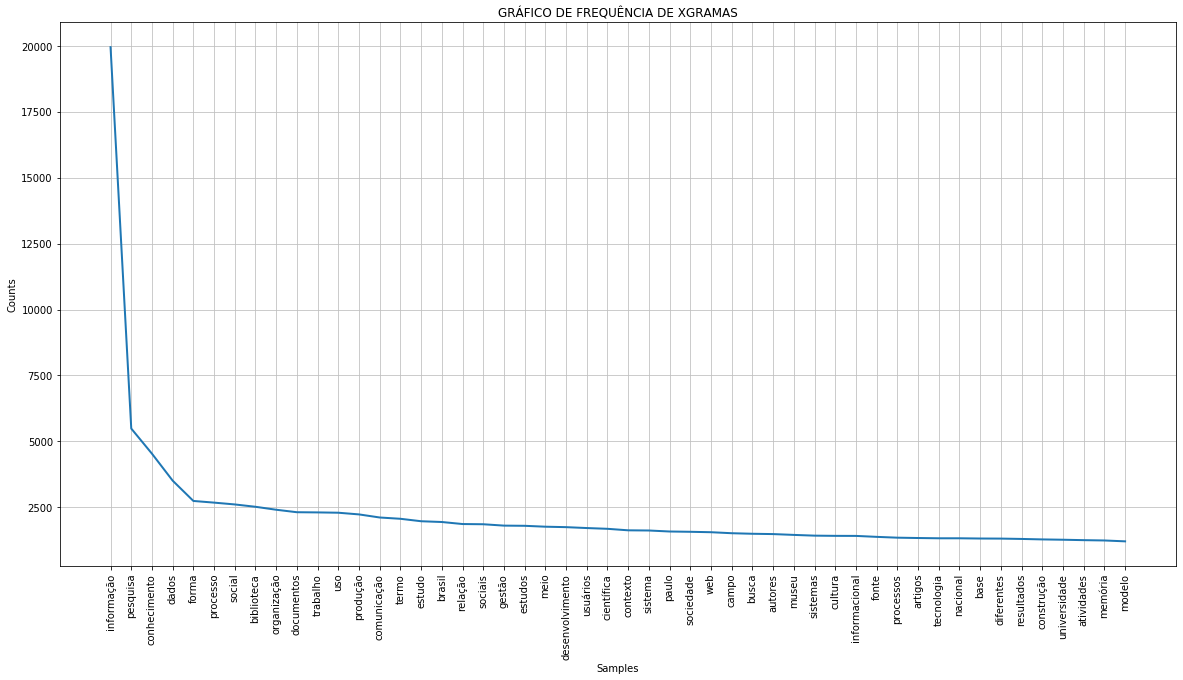

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

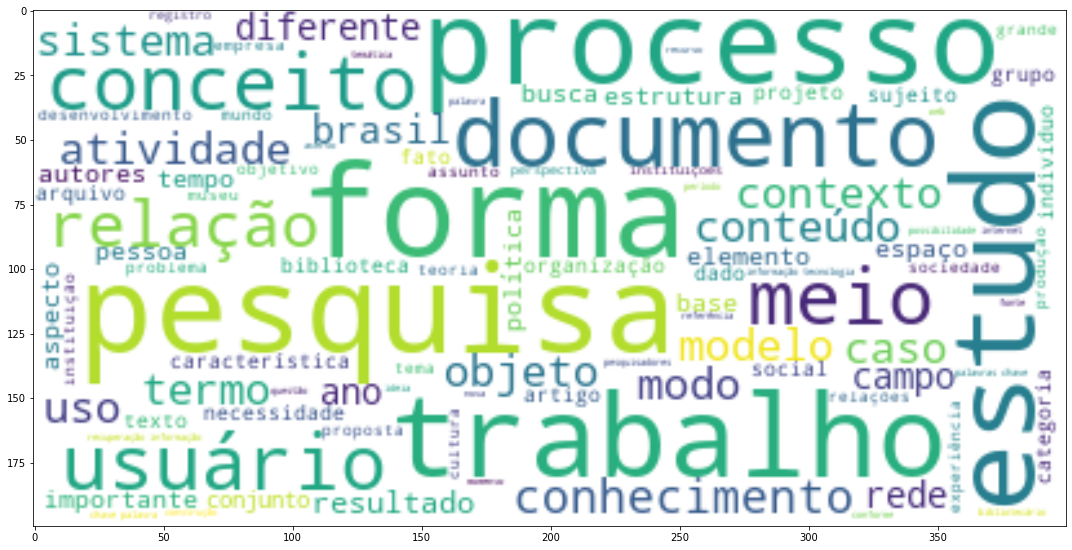

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("artigosresumos_nuv_enancib_2014_gts.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 3min 51s
Tópico 0:  0.002*"informação" + 0.001*"pesquisa" + 0.001*"dados" + 0.001*"biblioteca" + 0.001*"brasil" + 0.001*"termo" + 0.001*"conhecimento" + 0.001*"nacional" + 0.001*"digital" + 0.001*"trabalho"
Tópico 1:  0.002*"informação" + 0.001*"termo" + 0.001*"pesquisa" + 0.001*"conhecimento" + 0.001*"organização" + 0.001*"desenvolvimento" + 0.001*"campo" + 0.001*"qualidade" + 0.000*"vida" + 0.000*"sistemas"
Tópico 2:  0.003*"informação" + 0.002*"conhecimento" + 0.001*"social" + 0.001*"cultura" + 0.001*"rede" + 0.001*"organização" + 0.001*"sistemas" + 0.001*"dados" + 0.001*"sociais" + 0.001*"forma"
Tópico 3:  0.010*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"forma" + 0.001*"processo" + 0.001*"uso" + 0.001*"comunicação" + 0.001*"informacional" + 0.001*"usuários"
Tópico 4:  0.003*"informação" + 0.001*"biblioteca" + 0.001*"m

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 4min 42s
Tópico 0:  0.007*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"gestão" + 0.001*"forma" + 0.001*"produção" + 0.001*"organização" + 0.001*"direitos" + 0.001*"rede" + 0.001*"dados"
Tópico 1:  0.002*"informação" + 0.001*"pesquisa" + 0.001*"formação" + 0.001*"brasil" + 0.001*"bibliotecário" + 0.001*"autores" + 0.000*"energia" + 0.000*"nacional" + 0.000*"education" + 0.000*"trabalho"
Tópico 2:  0.006*"informação" + 0.001*"pesquisa" + 0.001*"termo" + 0.001*"sociais" + 0.001*"redes" + 0.001*"conhecimento" + 0.001*"rede" + 0.001*"dados" + 0.001*"estudo" + 0.001*"curso"
Tópico 3:  0.004*"informação" + 0.002*"documentos" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"arquivos" + 0.001*"gestão" + 0.001*"arquivo" + 0.001*"processo" + 0.001*"documental" + 0.001*"forma"
Tópico 4:  0.005*"informação" + 0.001*"pesquisa" + 0.001*"dados" + 0.001*

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 5min 19s
Tópico 0:  0.001*"ranganathan" + 0.001*"categorias" + 0.000*"museu" + 0.000*"matéria" + 0.000*"contexto" + 0.000*"assunto" + 0.000*"memória" + 0.000*"categoria" + 0.000*"classificação" + 0.000*"big_data"
Tópico 1:  0.012*"informação" + 0.002*"conhecimento" + 0.002*"pesquisa" + 0.002*"termo" + 0.002*"forma" + 0.001*"organização" + 0.001*"dados" + 0.001*"social" + 0.001*"comunicação" + 0.001*"processo"
Tópico 2:  0.006*"informação" + 0.003*"documentos" + 0.002*"arquivo" + 0.002*"arquivos" + 0.002*"pesquisa" + 0.001*"gestão" + 0.001*"processo" + 0.001*"documental" + 0.001*"organização" + 0.001*"biblioteca"
Tópico 3:  0.003*"informação" + 0.001*"autores" + 0.001*"pesquisa" + 0.001*"estudos" + 0.001*"conhecimento" + 0.001*"científica" + 0.001*"museu" + 0.001*"documentação" + 0.001*"brasil" + 0.001*"produção"
Tópico 4:  0.001*"informação" + 0.001*"atores"

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 6min 9s
Tópico 0:  0.007*"informação" + 0.002*"biblioteca" + 0.001*"pesquisa" + 0.001*"processo" + 0.001*"trabalho" + 0.001*"bibliotecário" + 0.001*"sistema" + 0.001*"brasil" + 0.001*"conhecimento" + 0.001*"políticas"
Tópico 1:  0.000*"arte" + 0.000*"vocabulário" + 0.000*"descritores" + 0.000*"vocabulário_controlado" + 0.000*"artes" + 0.000*"controlado" + 0.000*"international" + 0.000*"organization" + 0.000*"international_standard_organization" + 0.000*"standard_organization"
Tópico 2:  0.003*"informação" + 0.001*"usuários" + 0.001*"dados" + 0.001*"processo" + 0.001*"usuário" + 0.001*"sociais" + 0.001*"redes" + 0.001*"web" + 0.001*"busca" + 0.001*"sistema"
Tópico 3:  0.003*"informação" + 0.003*"conhecimento" + 0.002*"organização" + 0.002*"pesquisa" + 0.001*"documentos" + 0.001*"arquivo" + 0.001*"arquivos" + 0.001*"dados" + 0.001*"classificação" + 0.001*"cult

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 7min 9s
Tópico 0:  0.008*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"documentos" + 0.001*"processo" + 0.001*"gestão" + 0.001*"biblioteca" + 0.001*"patrimônio" + 0.001*"museu" + 0.001*"organização"
Tópico 1:  0.002*"informação" + 0.001*"conhecimento" + 0.001*"memória" + 0.001*"atores" + 0.001*"rede" + 0.001*"brasil" + 0.001*"meg" + 0.001*"pesquisa" + 0.001*"paulo" + 0.001*"sociais"
Tópico 2:  0.001*"ranganathan" + 0.001*"wikipédia" + 0.001*"categorias" + 0.001*"matéria" + 0.001*"assunto" + 0.000*"tempo" + 0.000*"categoria" + 0.000*"contexto" + 0.000*"teoria" + 0.000*"memória"
Tópico 3:  0.002*"informação" + 0.002*"pesquisa" + 0.001*"rede" + 0.001*"assunto" + 0.001*"autores" + 0.001*"documentos" + 0.001*"estrutura" + 0.001*"redes" + 0.001*"estudo" + 0.001*"dados"
Tópico 4:  0.004*"informação" + 0.003*"pesquisa" + 0.002*"dados" + 0.001*"grup

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 8min 5s
Tópico 0:  0.001*"licitação" + 0.001*"documentos" + 0.001*"lei" + 0.001*"twitter" + 0.001*"candidatos" + 0.001*"rede" + 0.001*"candidato" + 0.001*"uff" + 0.001*"conversação" + 0.000*"processos_licitação"
Tópico 1:  0.013*"informação" + 0.002*"pesquisa" + 0.002*"gestão" + 0.001*"organização" + 0.001*"gestão_informação" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"serviços" + 0.001*"informacional" + 0.001*"mediação"
Tópico 2:  0.001*"indexação" + 0.001*"facetada" + 0.001*"analistas" + 0.001*"usabilidade" + 0.001*"classificação" + 0.000*"etiquetagem" + 0.000*"taxonomia" + 0.000*"taxonomia_facetada" + 0.000*"usuário" + 0.000*"faceted"
Tópico 3:  0.001*"cinema" + 0.001*"canais" + 0.001*"televisão" + 0.001*"audiovisual" + 0.001*"lei" + 0.001*"brasil" + 0.001*"globo" + 0.001*"filmes" + 0.000*"brasileiro" + 0.000*"programação"
Tópico 4:  0.005*"informação

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 9min 6s
Tópico 0:  0.003*"informação" + 0.001*"definições" + 0.001*"termo" + 0.001*"conceito" + 0.001*"blogs" + 0.001*"ontologias" + 0.001*"funk" + 0.001*"pesquisa" + 0.001*"musical" + 0.001*"forma"
Tópico 1:  0.006*"informação" + 0.002*"pesquisa" + 0.002*"biblioteca" + 0.002*"dados" + 0.001*"artigos" + 0.001*"nacional" + 0.001*"brasil" + 0.001*"citação" + 0.001*"periódicos" + 0.001*"instituições"
Tópico 2:  0.011*"informação" + 0.003*"conhecimento" + 0.002*"pesquisa" + 0.002*"dados" + 0.002*"organização" + 0.001*"forma" + 0.001*"processo" + 0.001*"termo" + 0.001*"uso" + 0.001*"informacional"
Tópico 3:  0.001*"cultura" + 0.001*"informação" + 0.001*"brasil" + 0.001*"pop" + 0.001*"japonesa" + 0.001*"produção" + 0.001*"identidade" + 0.001*"cultural" + 0.001*"empresas" + 0.001*"memória"
Tópico 4:  0.000*"informação" + 0.000*"social" + 0.000*"pesquisa" + 0.000*"c

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 10min 56s
Tópico 0:  0.003*"informação" + 0.002*"museu" + 0.002*"digital" + 0.002*"arte" + 0.001*"documentação" + 0.001*"coleção" + 0.001*"inclusão" + 0.001*"inclusão_digital" + 0.001*"termo" + 0.001*"projeto"
Tópico 1:  0.004*"informação" + 0.002*"inteligência" + 0.002*"cartas" + 0.001*"trabalho" + 0.001*"informacionais" + 0.001*"competências" + 0.001*"processo" + 0.001*"organização" + 0.001*"informacional" + 0.001*"artigos"
Tópico 2:  0.003*"memória" + 0.001*"cidade" + 0.001*"bairro" + 0.001*"virtual" + 0.001*"representações" + 0.001*"coletiva" + 0.001*"imaginários" + 0.001*"história" + 0.001*"lugares" + 0.001*"fotografias"
Tópico 3:  0.004*"conhecimento" + 0.002*"cultura" + 0.002*"organização_conhecimento" + 0.002*"organização" + 0.002*"semiótica" + 0.001*"semiótica_cultura" + 0.001*"organization" + 0.001*"bentham" + 0.001*"conhecimento_organization" + 0.

### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 11min 1s
Tópico 0:  0.001*"crise" + 0.001*"trabalho" + 0.001*"emprego" + 0.001*"brasil" + 0.001*"espanha" + 0.001*"setor" + 0.000*"bibliotecários" + 0.000*"bibliotecário" + 0.000*"tempo" + 0.000*"ofertas"
Tópico 1:  0.003*"documentos" + 0.002*"informação" + 0.002*"termo" + 0.001*"documento" + 0.001*"documental" + 0.001*"performance" + 0.001*"história" + 0.001*"identificação" + 0.001*"pesquisa" + 0.001*"consultas"
Tópico 2:  0.001*"museu" + 0.001*"fotografia" + 0.001*"education" + 0.001*"superior" + 0.001*"higher" + 0.001*"internacionalización" + 0.001*"higher_education" + 0.001*"metadados" + 0.001*"científica" + 0.001*"objeto"
Tópico 3:  0.001*"university" + 0.001*"información" + 0.001*"derechos" + 0.001*"publicados" + 0.000*"crecimiento" + 0.000*"bibliometría" + 0.000*"copyright" + 0.000*"autores" + 0.000*"debiblioteca" + 0.000*"mexicanos"
Tópico 4:  0.001*

Tópico 40:  0.006*"biblioteca" + 0.004*"informação" + 0.002*"social" + 0.002*"usuários" + 0.001*"autoridade" + 0.001*"comunicação" + 0.001*"leitura" + 0.001*"cultural" + 0.001*"registros" + 0.001*"dispositivos"
Tópico 41:  0.005*"informação" + 0.003*"conhecimento" + 0.001*"pesquisa" + 0.001*"dados" + 0.001*"vigilância" + 0.001*"meg" + 0.001*"organização" + 0.001*"termo" + 0.001*"uso" + 0.001*"science"


## Imprimir o melhor resultado - LDA

In [36]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 12 TÓPICOS ==================================================

Wall time: 3min 49s
Tópico 0:  0.008*"informação" + 0.002*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"biblioteca" + 0.001*"social" + 0.001*"artigos" + 0.001*"estudos" + 0.001*"produção" + 0.001*"científica"
Tópico 1:  0.007*"informação" + 0.001*"organização" + 0.001*"pesquisa" + 0.001*"conhecimento" + 0.001*"forma" + 0.001*"sistema" + 0.001*"processo" + 0.001*"comunicação" + 0.001*"fontes" + 0.001*"dados"
Tópico 2:  0.005*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"biblioteca" + 0.001*"documentos" + 0.001*"dados" + 0.001*"trabalho" + 0.001*"gestão" + 0.001*"forma" + 0.001*"processo"
Tópico 3:  0.005*"informação" + 0.001*"documentos" + 0.001*"dados" + 0.001*"processo" + 0.001*"conhecimento" + 0.001*"pesquisa" + 0.001*"uso" + 0.001*"gestão" + 0.001*"estudos" + 0.001*"sociais"
Tópico 4:  0.004*"informação" + 0.001*"usuários" + 0.001*"int

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [37]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_enancib_2014_gts.html')
vis

D:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 4h 11min 6s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.111313  0.012368       1        1  18.301178
11     0.104032  0.091290       2        1  18.026392
6      0.055323 -0.163169       3        1  15.421174
2      0.054021  0.010328       4        1  11.406686
1      0.016813  0.000350       5        1   8.575986
5     -0.045451 -0.000673       6        1   6.628504
3     -0.015383  0.007097       7        1   6.284985
10    -0.058413  0.002986       8        1   4.166921
8     -0.041580  0.011833       9        1   4.143723
9     -0.044211  0.014091      10        1   3.201846
4     -0.050149  0.003391      11        1   3.044424
7     -0.086314  0.010108      12        1   0.798189, topic_info=      Category          Freq               Term         Total  loglift  \
3719   Default  14742.000000         informação  14742.000000  30.0000   
76724  Default    976.000000              museu    976.000000  29.0000   
2020   Default    362.000000           direitos    362.000000  28.0000   
29466  Default   1303.000000             gestão   1303.000000  27.0000   
36849  Default    836.000000            memória    836.000000  26.0000   
...        ...           ...                ...           ...      ...   
6210   Topic12      4.448154            relação   1354.828613  -0.8884   
29469  Topic12      4.069773  gestão_informação    348.487061   0.3806   
12431  Topic12      3.891810           produtos    323.799652   0.4093   
2544   Topic12      3.764717             escola    245.121780   0.6545   
4965   Topic12      3.671350          percepção    188.538864   0.8918   

       logprob  
3719   30.0000  
76724  29.0000  
2020   28.0000  
29466  27.0000  
36849  26.0000  
...        ...  
6210   -8.4899  
29469  -8.5788  
12431  -8.6235  
2544   -8.6567  
4965   -8.6818  

[979 rows x 6 columns], token_table=         Topic      Freq                       Term
term                                               
1262277      3  0.997041  abordagens_socioculturais
611048       9  0.975321                        aca
58859        1  0.127736             acessibilidade
58859        2  0.013306             acessibilidade
58859        3  0.420466             acessibilidade
...        ...       ...                        ...
13988       11  0.014406                        web
451365       1  0.966531              web_start-ups
7760         6  0.978882                     whoqol
374119       2  0.996876                   wieringa
348730       9  0.944894                       xslt

[3281 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 12, 7, 3, 2, 6, 4, 11, 9, 10, 5, 8])

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 32.1 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.511*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  0.562*"biblioteca" + -0.234*"documentos" + -0.221*"conhecimento" + 0.219*"usuários" + -0.163*"organização" + -0.156*"gestão" + 0.125*"usuário" + 0.115*"social" + 0.109*"bibliotecário" + -0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.259*"arquivos" + -0.241*"conhecimento" + -0.232*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.162*"arquivo"
Tópico #4:  0.326*"conhec

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 30.1 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.511*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  -0.562*"biblioteca" + 0.233*"documentos" + 0.221*"conhecimento" + -0.219*"usuários" + 0.163*"organização" + 0.156*"gestão" + -0.125*"usuário" + -0.115*"social" + -0.110*"bibliotecário" + 0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.259*"arquivos" + -0.241*"conhecimento" + -0.233*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.161*"arquivo"
Tópico #4:  -0.325*"conhe

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 30.6 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.511*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  0.562*"biblioteca" + -0.233*"documentos" + -0.221*"conhecimento" + 0.219*"usuários" + -0.163*"organização" + -0.156*"gestão" + 0.125*"usuário" + 0.116*"social" + 0.109*"bibliotecário" + -0.105*"metadados"
Tópico #3:  -0.297*"documentos" + -0.259*"arquivos" + 0.241*"conhecimento" + 0.232*"dados" + -0.211*"direitos" + 0.200*"pesquisa" + -0.198*"biblioteca" + 0.185*"artigos" + 0.166*"científica" + -0.162*"arquivo"
Tópico #4:  0.325*"conhec

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 34.9 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.510*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  -0.562*"biblioteca" + 0.233*"documentos" + 0.221*"conhecimento" + -0.219*"usuários" + 0.163*"organização" + 0.157*"gestão" + -0.125*"usuário" + -0.115*"social" + -0.110*"bibliotecário" + 0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.259*"arquivos" + -0.241*"conhecimento" + -0.233*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.161*"arquivo"
Tópico #4:  -0.325*"conhe

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 35.4 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.511*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  -0.562*"biblioteca" + 0.234*"documentos" + 0.221*"conhecimento" + -0.219*"usuários" + 0.163*"organização" + 0.156*"gestão" + -0.125*"usuário" + -0.115*"social" + -0.110*"bibliotecário" + 0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.260*"arquivos" + -0.241*"conhecimento" + -0.233*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.161*"arquivo"
Tópico #4:  -0.325*"conhe

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 35.3 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  -0.510*"informação" + 0.222*"pesquisa" + 0.178*"documentos" + 0.159*"museu" + 0.154*"dados" + 0.146*"conhecimento" + 0.132*"biblioteca" + 0.126*"brasil" + 0.118*"arquivos" + 0.112*"científica"
Tópico #2:  0.562*"biblioteca" + -0.233*"documentos" + -0.221*"conhecimento" + 0.219*"usuários" + -0.163*"organização" + -0.157*"gestão" + 0.125*"usuário" + 0.115*"social" + 0.110*"bibliotecário" + -0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.259*"arquivos" + -0.241*"conhecimento" + -0.233*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.161*"arquivo"
Tópico #4:  0.326*"conhecimento" 

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 36.1 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.510*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  0.562*"biblioteca" + -0.233*"documentos" + -0.221*"conhecimento" + 0.219*"usuários" + -0.163*"organização" + -0.156*"gestão" + 0.125*"usuário" + 0.115*"social" + 0.109*"bibliotecário" + -0.105*"metadados"
Tópico #3:  -0.297*"documentos" + -0.260*"arquivos" + 0.240*"conhecimento" + 0.233*"dados" + -0.211*"direitos" + 0.200*"pesquisa" + -0.197*"biblioteca" + 0.186*"artigos" + 0.166*"científica" + -0.161*"arquivo"
Tópico #4:  0.325*"conhec

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 38.7 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  -0.511*"informação" + 0.222*"pesquisa" + 0.178*"documentos" + 0.159*"museu" + 0.154*"dados" + 0.146*"conhecimento" + 0.132*"biblioteca" + 0.126*"brasil" + 0.118*"arquivos" + 0.112*"científica"
Tópico #2:  -0.562*"biblioteca" + 0.233*"documentos" + 0.221*"conhecimento" + -0.219*"usuários" + 0.163*"organização" + 0.157*"gestão" + -0.125*"usuário" + -0.115*"social" + -0.109*"bibliotecário" + 0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.259*"arquivos" + -0.241*"conhecimento" + -0.233*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.161*"arquivo"
Tópico #4:  0.325*"conhecimento" 

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 44.4 s
Tópico #0:  0.789*"informação" + 0.162*"pesquisa" + 0.145*"conhecimento" + 0.101*"dados" + 0.087*"organização" + 0.086*"processo" + 0.082*"forma" + 0.080*"social" + 0.079*"uso" + 0.073*"biblioteca"
Tópico #1:  0.511*"informação" + -0.222*"pesquisa" + -0.178*"documentos" + -0.159*"museu" + -0.154*"dados" + -0.146*"conhecimento" + -0.132*"biblioteca" + -0.126*"brasil" + -0.118*"arquivos" + -0.112*"científica"
Tópico #2:  0.562*"biblioteca" + -0.233*"documentos" + -0.221*"conhecimento" + 0.219*"usuários" + -0.163*"organização" + -0.156*"gestão" + 0.125*"usuário" + 0.115*"social" + 0.110*"bibliotecário" + -0.105*"metadados"
Tópico #3:  0.297*"documentos" + 0.259*"arquivos" + -0.241*"conhecimento" + -0.233*"dados" + 0.211*"direitos" + -0.200*"pesquisa" + 0.198*"biblioteca" + -0.186*"artigos" + -0.166*"científica" + 0.161*"arquivo"
Tópico #4:  -0.325*"conhe

## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))